In [1]:
import numpy as numpy
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/spam.csv', encoding='latin1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns = {'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)
df.sample(5)

,v1,v2
4352,ham,Fun fact: although you would think armand woul...
3785,ham,Wat r u doing?
1521,ham,Are you angry with me. What happen dear
2203,ham,soon you will have the real thing princess! Do...
5056,ham,Hey next sun 1030 there's a basic yoga course....


In [7]:
#renaming
df.rename(columns={'v1':'target','v2':'text'}, inplace =True)
df.sample(5)

,target,text
2811,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
4658,ham,I cant pick the phone right now. Pls send a me...
3686,ham,Great! I shoot big loads so get ready!
4538,ham,"Party's at my place at usf, no charge (but if ..."
4124,ham,May b approve panalam...but it should have mor...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
#Encoding target values into numerical values(0-ham, 1-Spam)
df['target']= encoder.fit_transform(df['target'])

In [10]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#duplicates
df.duplicated().sum()

403

In [13]:
#removing duplicates
df = df.drop_duplicates(keep="first")

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

### EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

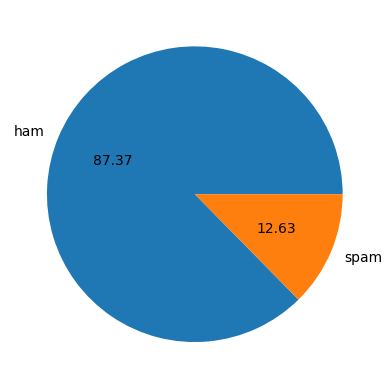

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [18]:
#for imbalances in text
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#num chars in text
df['num_chars']= df['text'].apply(len)

In [21]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#num of words
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
#num of sentences
df["num_sent"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#Spam counts
df[df['target']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
#Ham counts
df[df['target']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

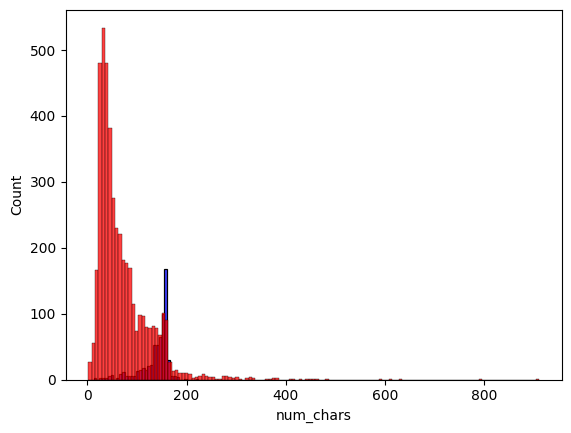

In [30]:
sns.histplot(df[df['target']==1]['num_chars'],color='blue')
sns.histplot(df[df['target']==0]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

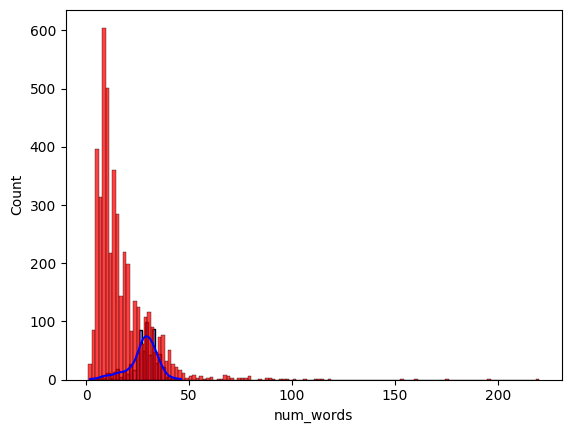

In [31]:
sns.histplot(df[df['target']==1]['num_words'],kde=True,color='blue')
sns.histplot(df[df['target']==0]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

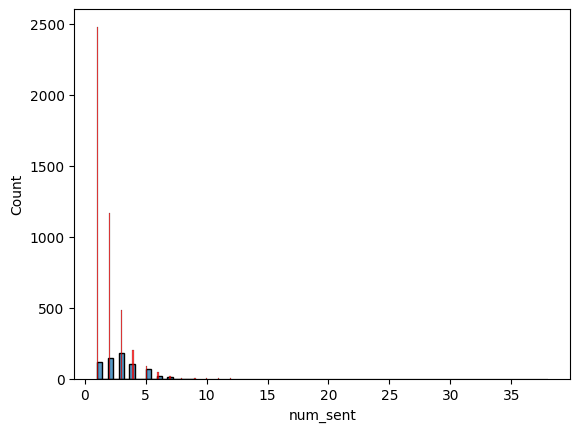

In [32]:
sns.histplot(df[df['target']==1]['num_sent'])
sns.histplot(df[df['target']==0]['num_sent'],color='red')

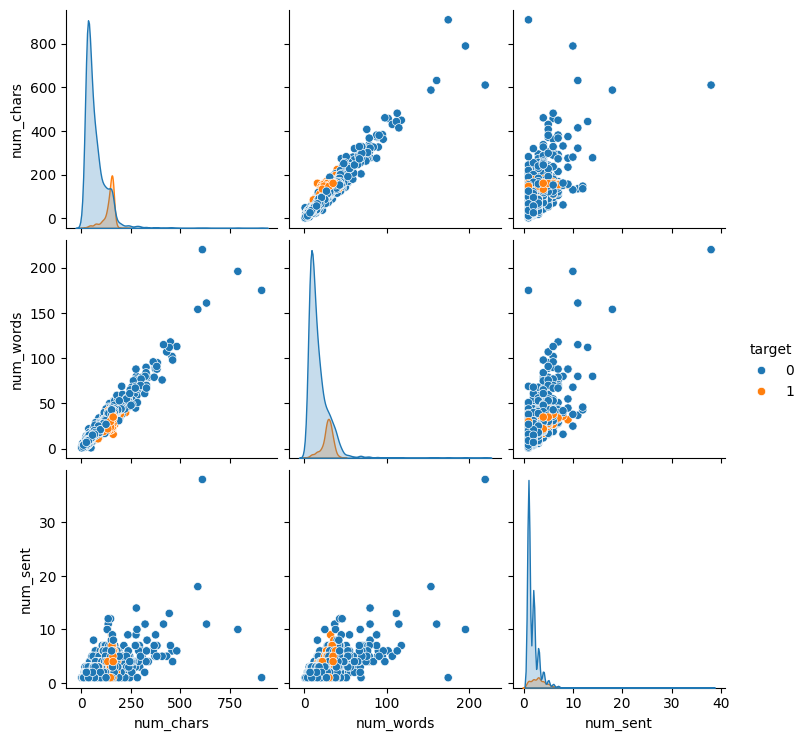

In [33]:
sns.pairplot(df,hue='target')

<Axes: >

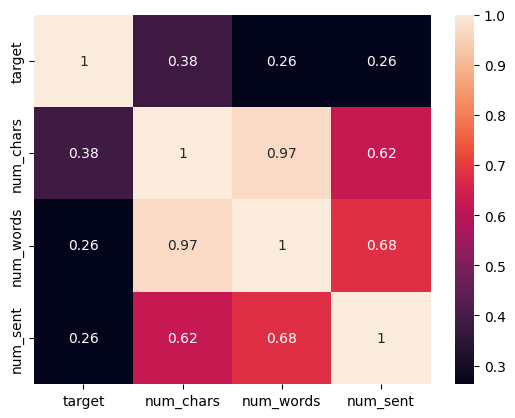

In [36]:
sns.heatmap(df[['target','num_chars','num_words','num_sent']].corr(),annot=True)

### Data Preprocessing

In [91]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
nltk.download('punkt')  # For word_tokenize()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

ps = PorterStemmer()
stopwords = set(stopwords.words('english'))

In [ ]:
#preprocessing through lowercase, tokenisation, stopwords removal, punctuation removal, stemming

def transform_text(text):
    text =text.lower()
    # text = nltk.word_tokenize(re.sub(r'[^\w\s]', '', text))
    # text = [ps.stem(i) for i in text if i not in stopwords]
    words = word_tokenize(text)  

    # Remove punctuation & stopwords, then apply stemming
    words = [ps.stem(word) for word in words if word not in stop_words and word not in string.punctuation]

    return " ".join(words)  
    

In [122]:
transform_text("I'm don't am 201/;'';p ,,% learning NLP, it is very interesting...")

'm nt 201    p    learn nlp  interest '

In [117]:
df['transformed_text'] = df['text'].apply(transform_text)

In [118]:
df.head()   


,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [123]:
if "I'm" in stopwords:
    print("Yes")